## 자연어 처리 과제입니다

파일명 제출 : nlp_{이름}.ipynb  
제출기한일 : 2023.10.10  
제출 이메일 : bluelemonsky7@gmail.com  
분석 대상 데이터 : 네이버 평점 test 데이터

평가 관점
1. 코드를 작성하여 error 없이 진행해야 함
2. 각종 모델을 비교하거나 선택한 이유 등을 작성
3. train : test 비율은 7:3으로 함
4. 최종 평가에서 train 데이터에 대한 정확도 90 이상, test 데이터에 대한 정확도는 85 이상을 목표로 함
5. 모델 평가에서 고정된 결과가 나오도록 하세요

Part 1 . 분석 환경에 대한 정보를 보여주세요

1. python 버전 
2. 주용 사용 패키지 버전 정보 


In [1]:
import sys
print(f"sys 버전 :", sys.version)
import os
import pandas as pd
import konlpy
import numpy as np
print(f"numpy 버전 :", np.__version__)
import tensorflow as tf
print(f"tensorflow 버전 :", tf.__version__)
import nltk
print(f"nltk 버전 :", nltk.__version__)
import gensim
print(f"gensim 버전 :", gensim.__version__)
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
print(f"konlpy 버전 :", konlpy.__version__)
import tokenizers
print(f"tokenizers 버전 :", tokenizers.__version__)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
from nltk.tokenize import word_tokenize


sys 버전 : 3.11.4 (v3.11.4:d2340ef257, Jun  6 2023, 19:15:51) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 버전 : 1.24.3
tensorflow 버전 : 2.13.0
nltk 버전 : 3.8.1
gensim 버전 : 4.3.2
konlpy 버전 : 0.6.0
tokenizers 버전 : 0.14.1


Part 2. 분석 데이터를 로드하세요

1. 판다스로 데이터를 read 하세요

In [2]:
train_df = pd.read_csv('./data/ratings_train.csv')
train_df.dropna(inplace=True)

In [3]:
train_df.isnull().sum()

id          0
document    0
label       0
dtype: int64

Part 3. 텍스트 데이터를 EDA하세요

1. 통계적으로 텍스트를 확인해 보세요
2. 시각화 해보세요
3. 불용어(stop words)를 찾아보세요
4. 기타 여러 방법으로 EDA를 해보세요

In [4]:
# 특수 기호 제외하고 한글만 뽑아서 분석
train_df['document'] = train_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")

In [5]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
#글자수 확인을 위하여 document 컬럼을 str 타입으로 변경
train_df['document'] = train_df['document'].astype(str)

Text(0, 0.5, '빈도 수')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning

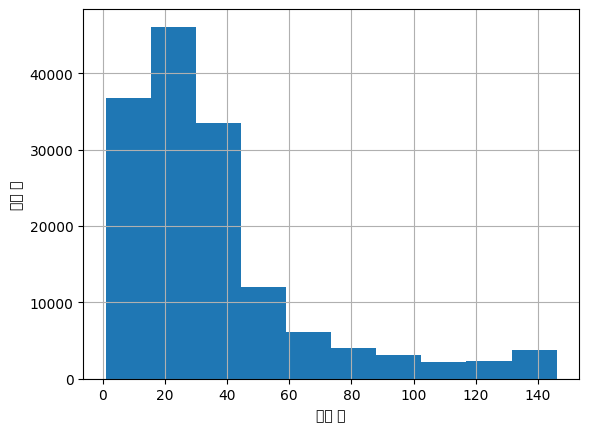

In [7]:
#리뷰 글자 수 히스토그램
ax = train_df['document'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

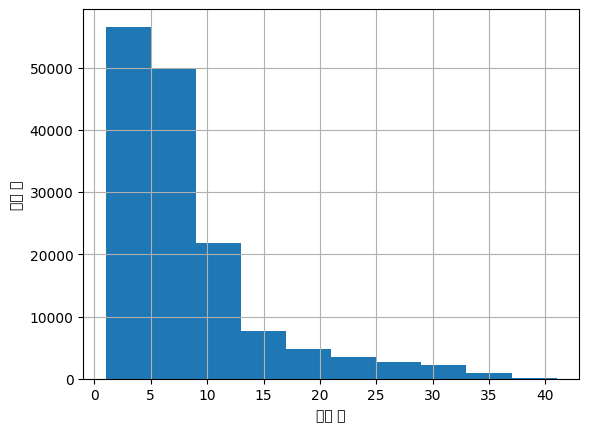

In [8]:
train_df['token_count'] = train_df['document'].str.split().map(lambda x: len(x))
ax = train_df['token_count'].hist()

ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
plt.show()

In [9]:
import konlpy
print(konlpy.__version__)

0.6.0


In [10]:
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [11]:
# 명사, 동사, 형용사 등의 빈도수를 계산
pos_dict = {}
for tag in okt.tagset.keys():
    pos_dict[tag] = 0

print(pos_dict)

for doc in train_df['document']:
    doc_pos = okt.pos(str(doc))
    for uni_pos in doc_pos :
        if uni_pos[1] in pos_dict.keys() :
            pos_dict[uni_pos[1]] = pos_dict[uni_pos[1]] + 1
        else :
            pos_dict[uni_pos[1]] = 1

print(pos_dict)

{'Adjective': 0, 'Adverb': 0, 'Alpha': 0, 'Conjunction': 0, 'Determiner': 0, 'Eomi': 0, 'Exclamation': 0, 'Foreign': 0, 'Hashtag': 0, 'Josa': 0, 'KoreanParticle': 0, 'Noun': 0, 'Number': 0, 'PreEomi': 0, 'Punctuation': 0, 'ScreenName': 0, 'Suffix': 0, 'Unknown': 0, 'Verb': 0}
{'Adjective': 189508, 'Adverb': 44652, 'Alpha': 12949, 'Conjunction': 4135, 'Determiner': 17825, 'Eomi': 518, 'Exclamation': 6353, 'Foreign': 6605, 'Hashtag': 4, 'Josa': 360544, 'KoreanParticle': 27531, 'Noun': 896632, 'Number': 27229, 'PreEomi': 14, 'Punctuation': 204877, 'ScreenName': 5, 'Suffix': 46007, 'Unknown': 0, 'Verb': 266856, 'Modifier': 32968, 'VerbPrefix': 10894, 'URL': 48, 'Email': 9}


Text(0, 0.5, '빈도 수')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Library/Frameworks/

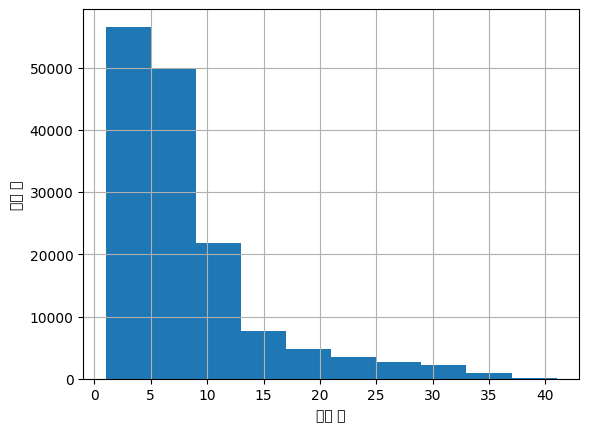

In [12]:
#토큰 수
ax = train_df['document'].str.split().map(lambda x: len(x)).hist()

ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

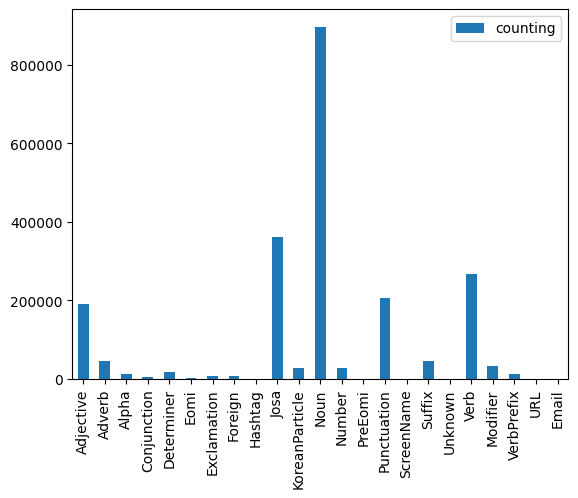

In [13]:
pd.DataFrame(pos_dict.values(), index=pos_dict.keys(), columns=['counting']).plot.bar()

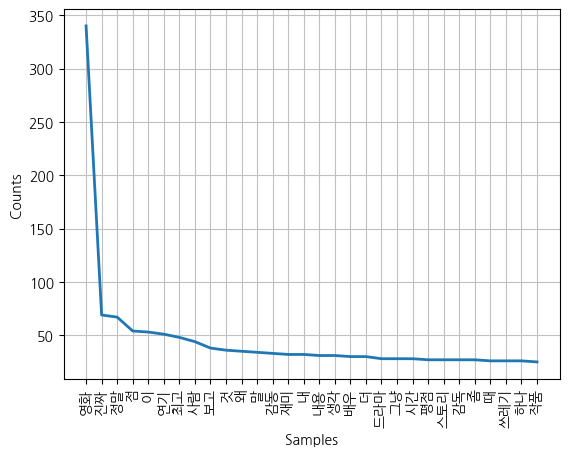

In [14]:
from nltk import Text 
import koreanize_matplotlib

all_reviews = ' '.join(train_df['document'][:1000].astype('str'))

review_nouns = Text(okt.nouns(all_reviews), name = "naver movie review")
review_nouns.plot(30)
plt.show()

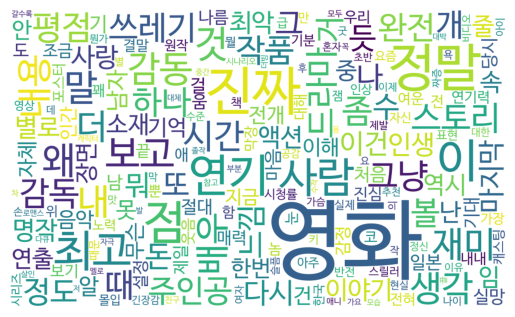

In [15]:
from wordcloud import WordCloud

font_path = 'C:\\Windows\\Fonts\\H2SA1M.TTF'
#맥 os는 '/Library/Fonts/NanumBarunGothic.otf'

wc = WordCloud(width=1000, height=600 , background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(review_nouns.vocab()))
plt.axis("off")
plt.show()

In [16]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()
okt = Okt()

In [17]:
def compare_morphs(sample_data):
    print(f'hannanum : {hannanum.morphs(sample_data)}')
    print(f'kkma : {kkma.morphs(sample_data)}' )
    print(f'komoran : {komoran.morphs(sample_data)}')
    print(f'okt : {okt.morphs(sample_data)}')

In [18]:
# 시리즈 내의 문자열 결합, 시간 절약을 위해 전체 리뷰에서 1천개만 가져온다
combined_text = train_df.iloc[:1000]['document'].str.cat(sep=' ')
combined_text

'아 더빙.. 진짜 짜증나네요 목소리 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 너무재밓었다그래서보는것을추천한다 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. 원작의 긴장감을 제대로 살려내지못했다. 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 액션이 없는데도 재미 있는 몇안되는 영화 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? 걍인피니트가짱이다.진짜짱이다♥ 볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~ 울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해 담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을. 취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지 ㄱ냥 매번 긴장되고 재밋음ㅠㅠ 참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다 굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐 이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥ 약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요. 나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님 보면서 웃지 않는 건 불가능하다 재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데 ; 이건 볼게없다 음식도 별로 안나오고, 핀란드 풍경이라도 구경할랫는데 그것도 별로 안나옴 ㅡㅡ 절대 평범한 영화가 아닌 수작이라는걸

In [19]:
# 문자열을 compare_morphs 함수에 전달
compare_morphs(combined_text)

hannanum : ['아', '더빙', '..', '진짜', '짜증나', '네', '요', '목소리', '흠', '.', '..', '포스터보고', '초딩영화줄', '....', '오버연기', '조차', '가볍', '지', '않', '구나', '너무재밓었다그래서보는것을추천한다', '교도소', '이야기구먼', '..', '솔직히', '재미', '는', '없', '다', '..', '평점', '조정', '사이몬페그', '의', '익살', '스런', '연기', '가', '돋보이', '었던', '영화', '!', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '하', '었던', '커스틴', '던스트', '가', '너무나', '도', '이쁘', '어', '보이', '었다', '막', '걸음마', '떼', 'ㄴ', '3세', '부터', '초등학교', '1학년생', '이', 'ㄴ', '8살용영화', '.', 'ㅋㅋㅋ', '...', '별반개', '도', '아깝', '음', '.', '원작', '의', '긴장감', '을', '제대로', '살리', '어', '내', '지', '못하', '었다', '.', '별', '반개', '도', '아깝', '다', '욕나온다', '이응경', '길용우', '연기생활이몇년', '이', 'ㄴ지', '..', '정말', '발로해', '도', '그것보단', '낫겟다', '납치', '.', '감금만반복반복', '..', '이드라마', '는', '가족도', '없', '다', '연기못하는사람만모엿네', '액션', '이', '없', '는데', '도', '재미', '있', '는', '몇안되', '는', '영화', '왜케', '평점', '이', '낮', '은', '것', '이', 'ㄴ데', '?', '꽤', '보', 'ㄹ', '만', '하', 'ㄴ데', '..', '헐리우드식', '화', '이', '리어', '하', 'ㅁ', '에만', '너무', '길들이', '어', '지', '어', '있', '나', '?', '걍인피니트가짱',

In [20]:
stopwords = []
f = open('./stopwords.txt', encoding='utf-8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()
print(stopwords)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어'

In [21]:
word_tokens = okt.morphs(combined_text)
rs = [word for word in word_tokens if word not in stopwords]
print(word_tokens)
print(rs)

['아', '더빙', '..', '진짜', '짜증나네요', '목소리', '흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍지', '않구나', '너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '한', '다', '교도소', '이야기', '구먼', '..', '솔직히', '재미', '는', '없다', '..', '평점', '조정', '사이', '몬페', '그', '의', '익살스런', '연기', '가', '돋보였던', '영화', '!', '스파이더맨', '에서', '늙어', '보이기만', '했던', '커스틴', '던스트', '가', '너무나도', '이뻐', '보였다', '막', '걸음', '마', '뗀', '3', '세', '부터', '초등학교', '1', '학년', '생인', '8', '살용', '영화', '.', 'ㅋㅋㅋ', '...', '별', '반개', '도', '아까', '움', '.', '원작', '의', '긴장감', '을', '제대로', '살려내지못', '했다', '.', '별', '반개', '도', '아깝다', '욕', '나온다', '이응경', '길용우', '연', '기', '생활', '이', '몇', '년', '인지', '..', '정말', '발', '로', '해도', '그것', '보단', '낫겟다', '납치', '.', '감금', '만', '반복', '반복', '..', '이', '드라마', '는', '가족', '도', '없다', '연기', '못', '하는', '사람', '만', '모', '엿', '네', '액션', '이', '없는데도', '재미', '있는', '몇', '안되는', '영화', '왜케', '평점', '이', '낮은건데', '?', '꽤', '볼', '만', '한', '데', '..', '헐리우드', '식', '화려함에만', '너무', '길들여져', '있나', '?', '걍', '인피니트', '가', '짱', '이다', '.', '

Part 4. 텍스트 데이터를 임베딩 하세요

1. 텍스트 토크나이즈를 해보세요
2. 텍스트를 벡터화 하세요

In [22]:
okt = Okt()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '을', '를', '는', '으로']

In [25]:
tfidf_vect = TfidfVectorizer(tokenizer=okt.morphs , stop_words=stopwords)

In [26]:
tfidf_vect.fit(train_df['document'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(stop_words=['의', '가', '이', '은', '들', '는', '좀', '을', '를', '는',
                            '으로'],
                tokenizer=<bound method Okt.morphs of <konlpy.tag._okt.Okt object at 0x300ac7ad0>>)

In [27]:
x_data = tfidf_vect.transform(train_df['document'][:1000])

In [28]:
x_data_arr = x_data.toarray()

In [29]:
tfidf_vect.get_feature_names_out()

array(['!', '!!', '!!!', ..., 'ｘ', '～', '￣∇￣'], dtype=object)

In [30]:
okt = Okt()

tokenized_words, sentence_nouns = [], []

for sentence in train_df['document']:
    if isinstance(sentence, str):  # 문자열인 경우에만 처리
        # 형태소 분석 토큰화
        tokenized_word = okt.morphs(sentence, stem=True)  # 토큰화 및 정규화
        stopwords_removed_sentence = [word for word in tokenized_word if not word in stopwords]
        tokenized_words.append(stopwords_removed_sentence)

        # 명사만 추출
        nouns = okt.nouns(sentence)
        sentence_nouns.append(nouns)


In [31]:
# 리뷰의 최대 길이
import statistics


word_len = [len(l) for l in tokenized_words]
nouns_len = [len(l) for l in sentence_nouns]

# 중앙값 계산
median_word_len = statistics.median(word_len)
median_nouns_len = statistics.median(nouns_len)

# 평균값 계산
mean_word_len = statistics.mean(word_len)
mean_nouns_len = statistics.mean(nouns_len)

print(f"가장 긴 단어 길이 : {max(word_len)} || 가장 짧은 단어 길이 : {min(word_len)}")
print(f"가장 긴 명사 길이 : {max(nouns_len)} || 가장 짧은 명사 길이 : {min(nouns_len)}")
print(f"단어 길이 중앙값 : {median_word_len} || 명사 길이 중앙값 : {median_nouns_len}")
print(f"단어 길이 평균값 : {mean_word_len} || 명사 길이 평균값 : {mean_nouns_len}")


가장 긴 단어 길이 : 95 || 가장 짧은 단어 길이 : 1
가장 긴 명사 길이 : 66 || 가장 짧은 명사 길이 : 0
단어 길이 중앙값 : 10 || 명사 길이 중앙값 : 4
단어 길이 평균값 : 12.936337877929263 || 명사 길이 평균값 : 5.977745924864162


Part 5. 분류 모델을 훈련하고 적용해 보세요

In [32]:
# 분류 모델 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
# pip install xgboost
from xgboost import XGBClassifier
# 분류 모델 평가
from sklearn.metrics import classification_report
from tqdm import tqdm # 분석 속도, 시간 확인, 정도 확인

In [33]:
# 1. 데이터 분리
X_train, y_train = train_df['document'][:100000], train_df['label'][:100000]
X_test, y_test = train_df['document'][100000:], train_df['label'][100000:]

In [35]:
X = train_df['document']
y = train_df['label']

In [36]:
# train, test 7:3 비율 만들기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X = train_df['document']  # 특성 데이터
y = train_df['label']  # 레이블 데이터

In [38]:
# train, test 7:3 비율 만들기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train.shape, X_test.shape

((104996,), (44999,))

In [40]:
class UserTokenizers:
    def __init__(self) -> None:
        self.okt = Twitter()
        self.kkma = Kkma()
        self.bpe_tokenizer_pretrained = Tokenizer.from_file('./tokenizer_data/bpe_tokenizer.json')
    @staticmethod
    def whitespaceToken(data : str) -> list:
        token_rs = data.split(' ')
        return token_rs
    @staticmethod
    def regexspllitToken(data : str, pat : str = '[\,\.!?\n]') -> list :
        re_rs = re.split(pat, data, maxsplit=0)
        token_rs = [ rs_unit.strip() for rs_unit in re_rs if len(rs_unit.strip()) > 1 ]
        return token_rs
    @staticmethod
    def regexselectToken(data : str, pat : str = '[\w]+') -> list:
        token_rs = RegexpTokenizer(pat).tokenize(data)
        return token_rs
    def BPETokenizer(self, data : str ) -> list:
        token_rs = self.bpe_tokenizer_pretrained.encode(data).tokens
        return token_rs
    # 한글과 영어를 같이 사용
    def tokenizingKorEng(self, data : str ) -> list:
        kor_re = re.findall('[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+', data)
        kor_str = ' '.join(kor_re)
        eng_re = re.findall('[a-zA-Z]+', data)
        eng_str = ' '.join(eng_re)
        kor_rs = self.okt.morphs(kor_str)
        eng_rs = word_tokenize(eng_str)
        token_rs = kor_rs + eng_rs
        return token_rs
    def konlpyNounsTokenizer(self, data: str) -> list:
        token_rs = self.kkma.nouns(data)
        return token_rs

In [41]:
from tokenizers import Tokenizer
ut_cls = UserTokenizers()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [42]:
stopwords = []
f = open('./stopwords.txt', encoding='utf-8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()

In [43]:
#tfidf_vect = TfidfVectorizer(tokenizer=ut_cls.BPETokenizer, stop_words=stopwords, ngram_range=(1, 2))
tfidf_vect = TfidfVectorizer(tokenizer=ut_cls.BPETokenizer, stop_words=stopwords)

In [44]:
tfidf_vect.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['<unk>', '가</w>', '가까', '가서</w>', '각</w>', '간</w>', '간에</w>', '갖', '같', '같다</w>', '같은</w>', '같이</w>', '개', '거', '거나</w>', '거리', '거의</w>', '겁', '것</w>', '것과</w>', '것도</w>', '것들</w>', '것만</w>', '것이</w>', '것이다</w>', '게', '게다가</w>', '겨우</w>', '견', '결과', '결국</w>', '결론', '경', '고', '곤', '곱</w>', '곳</w>', '공', '과</w>', '과연</w>', '관', '관계', '관련', '관한</w>', '구</w>', '구나</w>', '군', '그</w>', '그때</w>', '그래</w>', '그래도</w>', '그래서</w>', '그러', '그러나</w>', '그런', '그런</w>', '그런데</w>', '그럼</w>', '그럼에도</w>', '그렇', '그렇게</w>', '그렇지</w>', '그렇지만</w>', '그리

TfidfVectorizer(stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것',
                            '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서',
                            '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로',
                            '곧', '공동으로', '과', ...],
                tokenizer=<bound method UserTokenizers.BPETokenizer of <__main__.UserTokenizers object at 0x33f7ff250>>)

In [45]:
tfidf_vect.get_feature_names_out()

array(['!</w>', '"</w>', '%</w>', ..., '힘들었다</w>', '힘을</w>', '힘이</w>'],
      dtype=object)

In [46]:
class TransformVect:
    def __init__(self, vec_model) -> None:
        self.vec_model = vec_model

    def transVect_run(self, chunk_size : int = 500, data : pd.DataFrame = None ) -> np.array:
        data_len = len(data)

        for st_idx in tqdm(range(0, data_len, chunk_size)):
            tmp_data = data[st_idx:st_idx+chunk_size]

            if st_idx == 0:
                vec_arr = self.vec_model.transform(tmp_data).toarray()
                #print(f"num1 : {vec_arr.shape} || dim : {vec_arr.ndim}")
                
            else:
                tmp_data_arr = self.vec_model.transform(tmp_data).toarray()
                #print(f"num2 : {tmp_data_arr.shape} || dim: {tmp_data_arr.ndim}")

                vec_arr = np.concatenate([vec_arr, tmp_data_arr], 0)
                #print(f"num2 more : tmp_data_arr: {tmp_data_arr.shape} || vec_arr : {vec_arr.shape}")
                
        return vec_arr

            

In [47]:
tfv_cls = TransformVect(tfidf_vect)

In [48]:
y_train.sum(), y_train.count(), y_test.sum(), y_test.count()

(52494, 104996, 22331, 44999)

In [49]:
# 실행시간 약 20분
x_train = tfv_cls.transVect_run(chunk_size=100, data=X_train)

100%|██████████| 1050/1050 [18:05<00:00,  1.03s/it]


In [50]:
x_test = tfv_cls.transVect_run(chunk_size=100, data=X_test)

  0%|          | 0/450 [00:00<?, ?it/s]

100%|██████████| 450/450 [02:06<00:00,  3.55it/s]


In [51]:
x_train.shape , x_test.shape

((104996, 9744), (44999, 9744))

Part 6. 모델을 평가하세요

In [52]:
# 고정된 모델 결과
random_seed_num = 42

In [58]:
# 로지스틱 

clf_logistic = LogisticRegression(max_iter=3000, random_state=random_seed_num)
clf_logistic.fit(x_train, y_train)

y_train_pred = clf_logistic.predict(x_train)
y_test_pred = clf_logistic.predict(x_test)

In [59]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     52502
           1       0.88      0.87      0.87     52494

    accuracy                           0.88    104996
   macro avg       0.88      0.88      0.88    104996
weighted avg       0.88      0.88      0.88    104996

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22668
           1       0.85      0.85      0.85     22331

    accuracy                           0.85     44999
   macro avg       0.85      0.85      0.85     44999
weighted avg       0.85      0.85      0.85     44999



1. 로지스틱 모델을 택한 이유는 우선 데이터가 영화 리뷰의 텍스트 기반 데이터로 긍정과 부정의 이진 분류에 적합한 데이터이기 때문에 로지스틱 모델을 택했습니다. 

2. 맥북 환경으로 코드를 작성하고 있기 때문에 메모리가 상대적으로 적게 드는 로지스틱 모델을 사용해봤고 앙상블 모델과 KNN모델은 실행 시간이 오래 걸려 평가가 어려웠습니다.

3. TF-IDF를 통해 단어의 중요도를 수치화했기 때문에 각 단어에 대한 가중치를 학습할 수 있는 로지스틱 모델의 정확도가 높을 것으로 예상되었고 연관성이 있다고 생각했습니다.

4. 앙상블 모델과 KNN 모델은 실행 시간이 너무 길어져서 평가를 하지 못했고, 
의사결정나무, 랜덤포레스트, xgb모델도 평가해본 결과 로지스틱 모델이 가장 정확도가 높게 나왔습니다.